In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('ggplot')

# 9-light-gbm

In [3]:
X_train = pd.read_csv('../data/processed/train_features.csv')
y_train = pd.read_csv('../data/processed/train_target.csv')

In [4]:
X_test = pd.read_csv('../data/processed/test_features.csv')
y_test = pd.read_csv('../data/processed/test_target.csv')

In [5]:
X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

In [6]:
cols = X_train.columns.tolist()

In [7]:
assert list(X_train.columns) == list(X_test.columns)

In [8]:
X_cols, y_cols = X_train.columns, y_train.columns

In [11]:
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

In [12]:
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [13]:
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

In [14]:
X_train = pd.DataFrame(X_train, columns=X_cols)
X_test = pd.DataFrame(X_test, columns=X_cols)

In [15]:
y_train = pd.DataFrame(y_train, columns=y_cols)
y_test = pd.DataFrame(y_test, columns=y_cols)

In [16]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

## Light Gradient Boosting

In [17]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [18]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'num_leaves': [31, 63],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10]
}

In [19]:
mdl = lgb.LGBMRegressor(random_state=42)

In [20]:
t1 = time.time()
gscv = GridSearchCV(mdl, n_jobs=-1, cv=cv, param_grid=param_grid, verbose=1)
gscv.fit(X_train, y_train)
t2 = time.time()
print(t2 - t1)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
146.3362226486206


In [21]:
mdl = gscv.best_estimator_
mdl

LGBMRegressor(n_estimators=200, num_leaves=63, random_state=42)

In [24]:
from joblib import dump
dump(mdl, '../models/lgm_regressor.joblib')

['../models/lgm_regressor.joblib']

In [25]:
mean_squared_error(
    target_scaler.inverse_transform(y_train),
    target_scaler.inverse_transform(mdl.predict(X_train).reshape(-1,1)),
    squared=False
)

4569.957112099567

In [26]:
mean_squared_error(
    target_scaler.inverse_transform(y_test),
    target_scaler.inverse_transform(mdl.predict(X_test).reshape(-1,1)),
    squared=False
)

4849.6699578686375

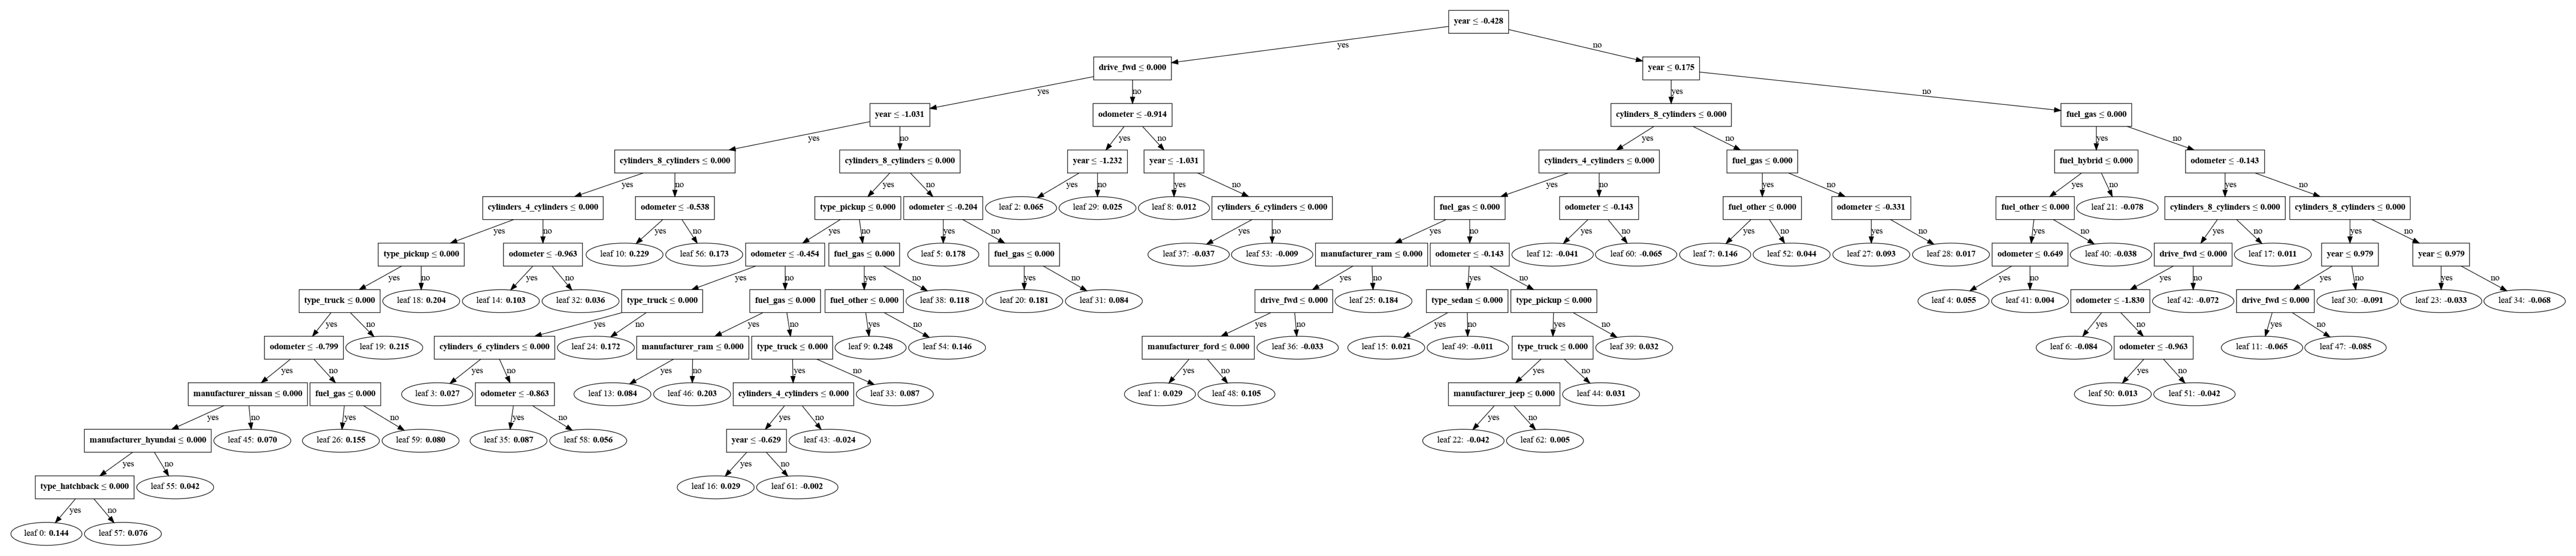

In [27]:
lgb.plot_tree(mdl, figsize=(40, 40), orientation='vertical', dpi=200)
plt.savefig(f'../reports/figures/light_gbm_tree.png')

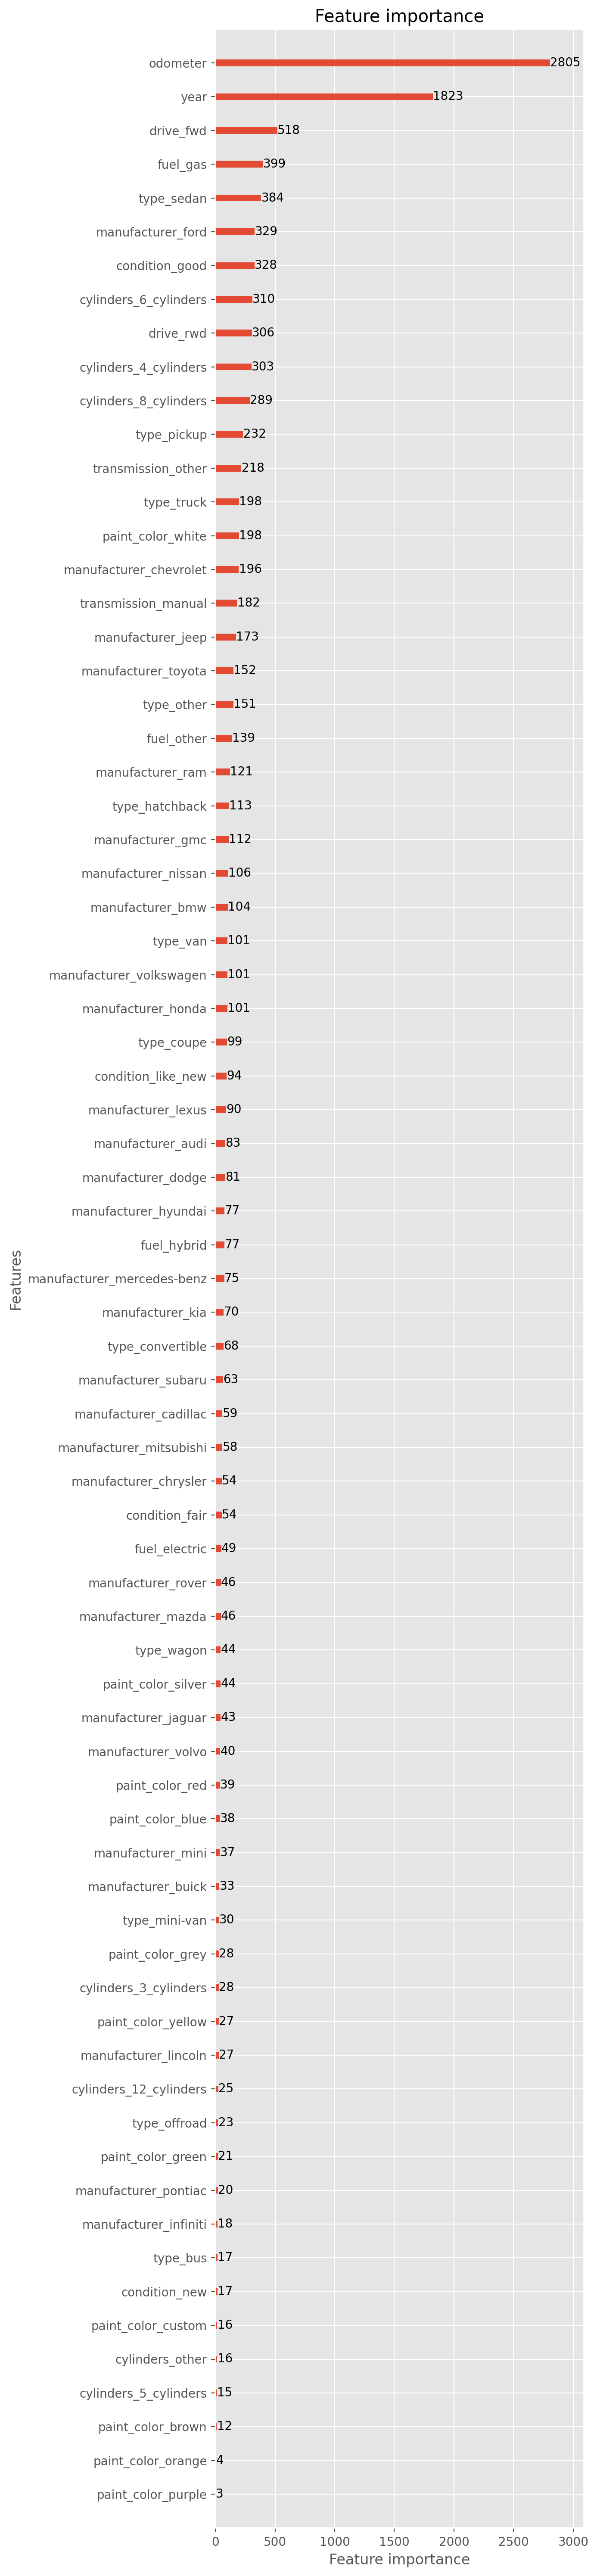

In [28]:
lgb.plot_importance(mdl, figsize=(7, 30), dpi=200)
plt.tight_layout()
plt.savefig(f'../reports/figures/light_gbm_importance.png')